# การสร้างกราฟแท่งด้วย pandas เบื้องต้น

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter # for custom number format on x and y axis
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
print(f'pandas version: {pd.__version__}')

pandas version: 0.25.1


In [4]:
pd.set_option('display.max_rows', 10)

### PISA score from Wikipedia
https://en.wikipedia.org/wiki/Programme_for_International_Student_Assessment

In [5]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/pisa2015.csv')
df

,Country,Maths,Science,Reading
0,Singapore,564,556,535
1,Hong Kong,548,523,527
2,Macau,544,529,509
3,Taiwan,542,532,497
4,Japan,532,538,516
...,...,...,...,...
65,Macedonia,371,384,352
66,Tunisia,367,386,361
67,Kosovo,362,378,347
68,Algeria,360,376,350


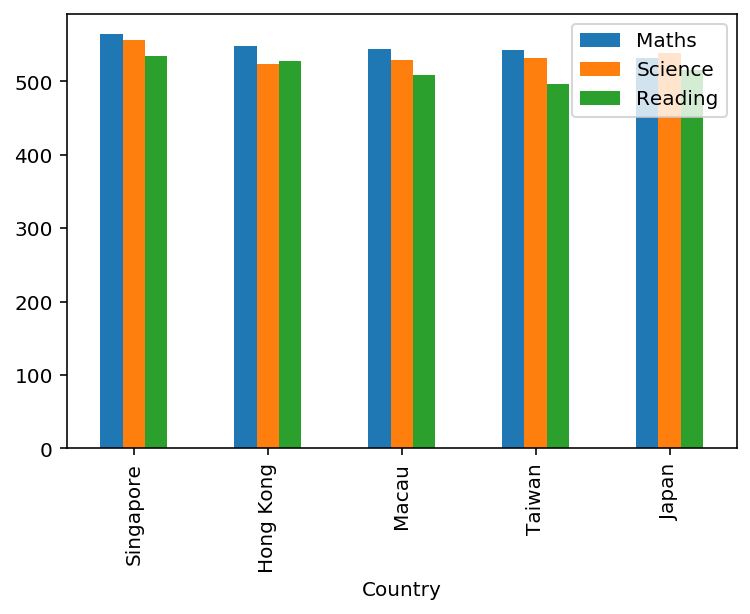

In [16]:
df[:5].plot(kind='bar'); #slice data for 5 top ranking by using[:n]

In [7]:
df.set_index('Country') #to temporary set country col as index col

,Maths,Science,Reading
Country,,,
Singapore,564,556,535
Hong Kong,548,523,527
Macau,544,529,509
Taiwan,542,532,497
Japan,532,538,516
...,...,...,...
Macedonia,371,384,352
Tunisia,367,386,361
Kosovo,362,378,347


In [8]:
df.set_index('Country', inplace=True) #to permanently set country col as index col

In [9]:
df

,Maths,Science,Reading
Country,,,
Singapore,564,556,535
Hong Kong,548,523,527
Macau,544,529,509
Taiwan,542,532,497
Japan,532,538,516
...,...,...,...
Macedonia,371,384,352
Tunisia,367,386,361
Kosovo,362,378,347


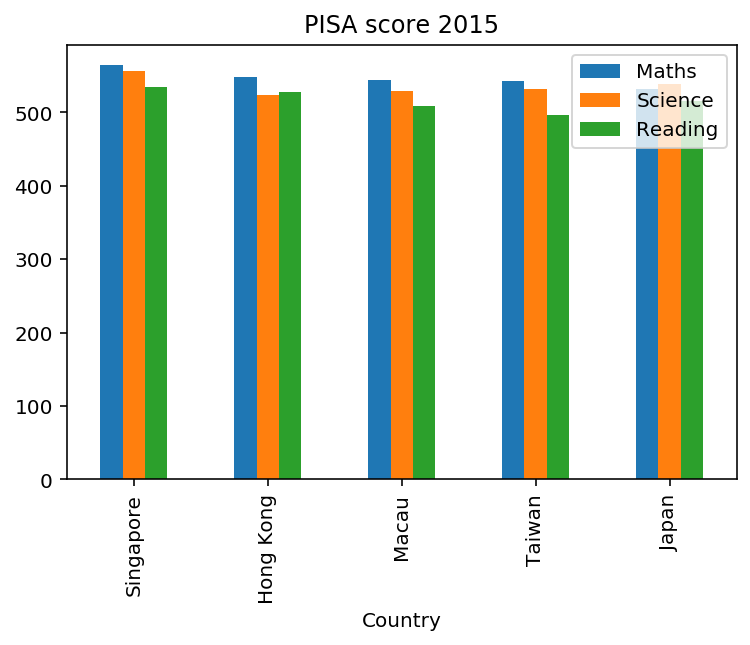

In [10]:
df[:5].plot(kind='bar', title='PISA score 2015');

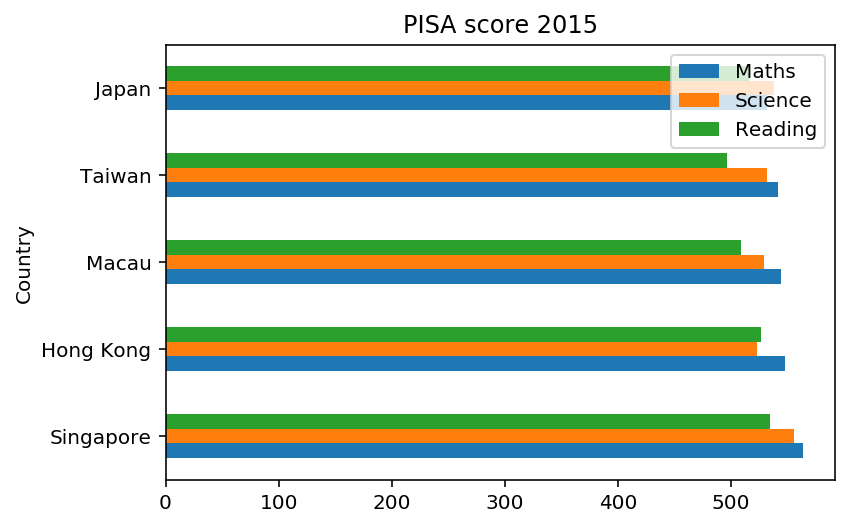

In [11]:
df[:5].plot(kind='barh', title='PISA score 2015');

# To set selected col as index col at first command

In [13]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/pisa2015.csv',
               index_col='Country')
df

,Maths,Science,Reading
Country,,,
Singapore,564,556,535
Hong Kong,548,523,527
Macau,544,529,509
Taiwan,542,532,497
Japan,532,538,516
...,...,...,...
Macedonia,371,384,352
Tunisia,367,386,361
Kosovo,362,378,347


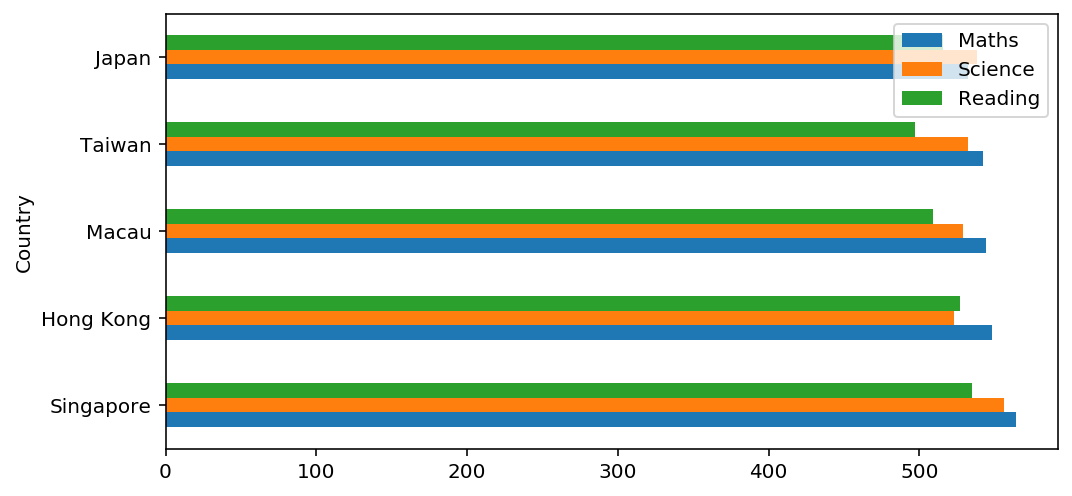

In [17]:
df[:5].plot(kind='barh', figsize=(8, 4)); #figsize(x/w,y/h)

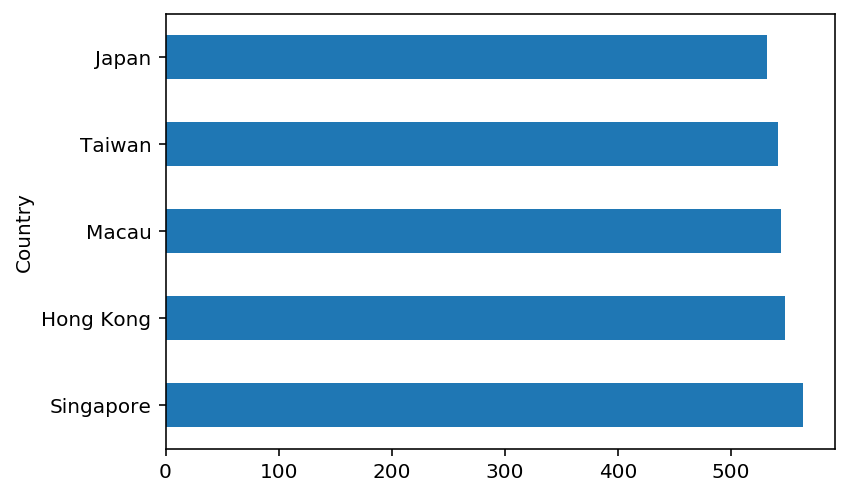

In [18]:
df[:5]['Maths'].plot(kind='barh'); #select only 1 col to display

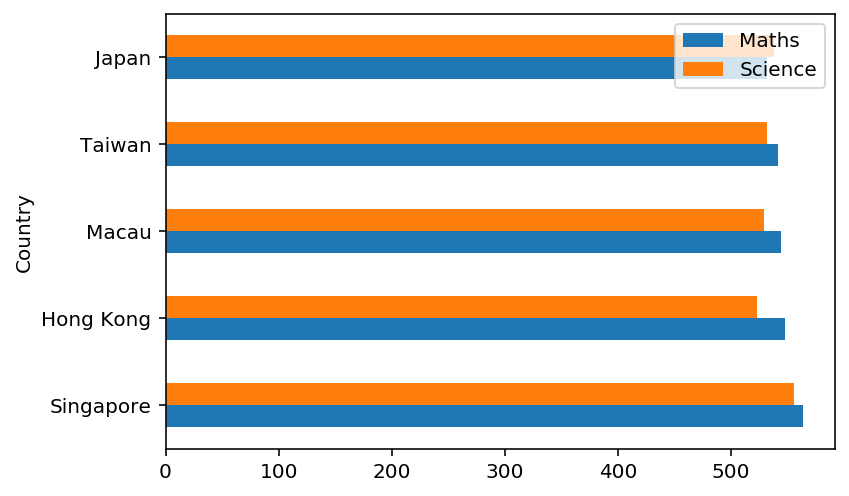

In [20]:
df[:5][['Maths', 'Science']].plot(kind='barh');#select only 2 cols to display by using list['a','b']

https://matplotlib.org/2.0.0/examples/color/named_colors.html

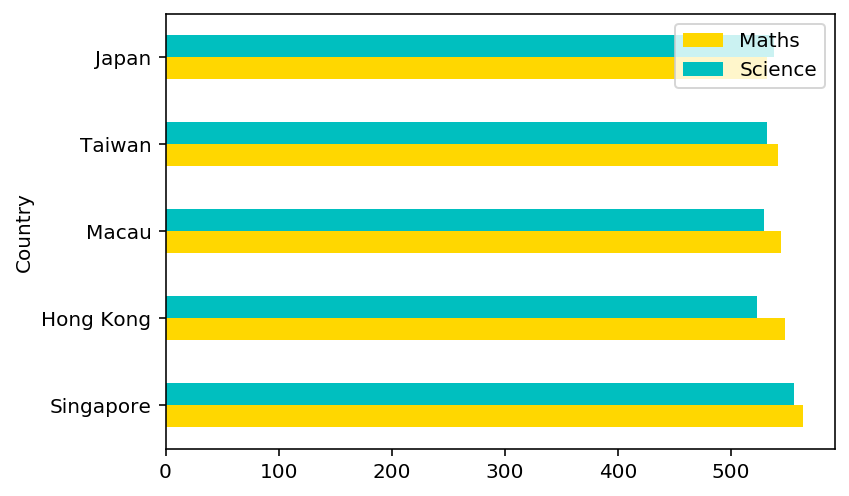

In [22]:
df[:5][['Maths', 'Science']].plot(kind='barh', color=['gold', 'c']);

# To create eyeline on graph ex.mean line,criteria line etc.

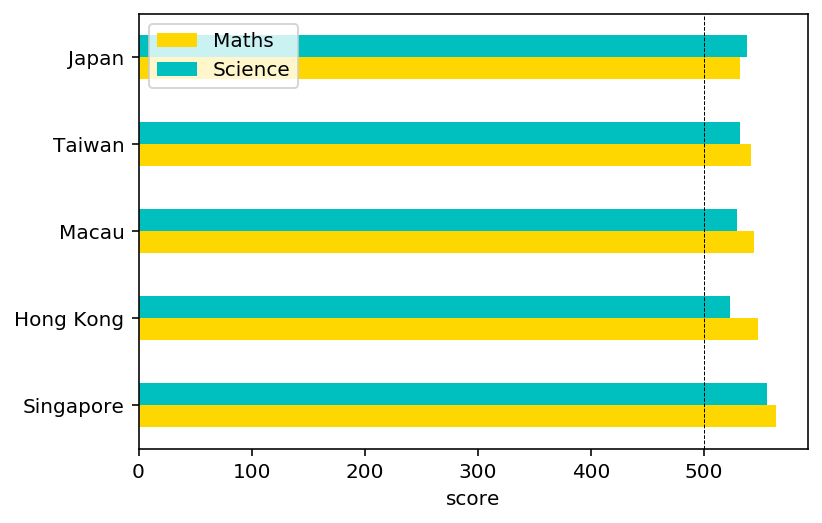

In [27]:
ax=df[:5][['Maths','Science']].plot(kind='barh',color=['gold','c']);
ax.axvline(500,color='.0',linestyle='--',linewidth=.5) #to create vertical line at point 500
ax.set_xlabel('score') #name label on x axis
ax.set_ylabel(''); #name label on y axis

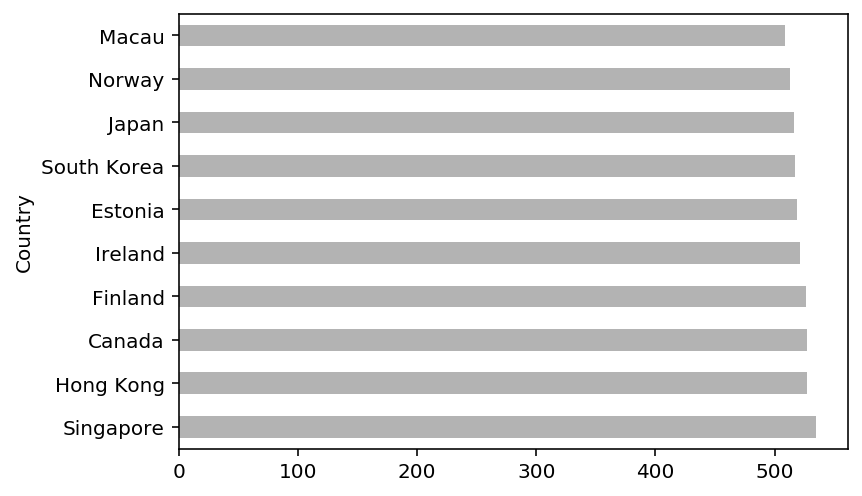

In [29]:
df.nlargest(10, 'Reading')['Reading'].plot(kind='barh', color='.7'); #to select top 10 of reading

# to select only observation need by .loc[[y1,y2,y3,...yn],'Match'].plot()

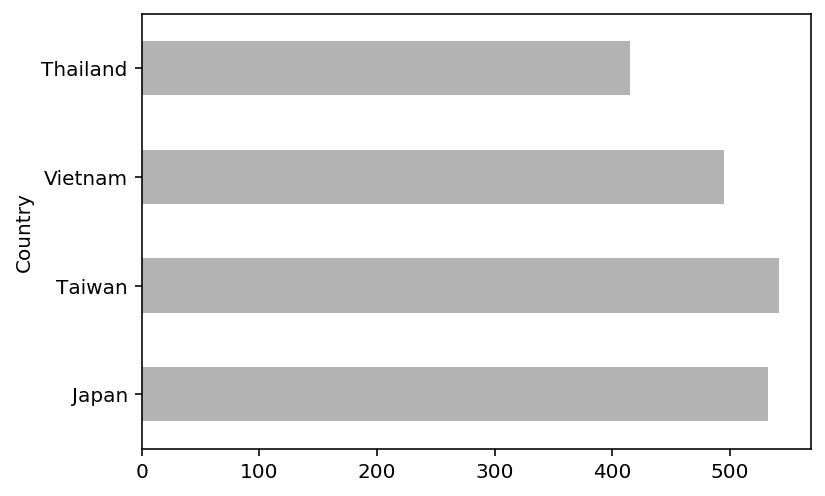

In [31]:
df.loc[['Japan', 'Taiwan', 'Vietnam', 'Thailand'], 'Maths'].plot(kind='barh', color='.7');

In [32]:
df.Maths.mean()

461.6714285714286

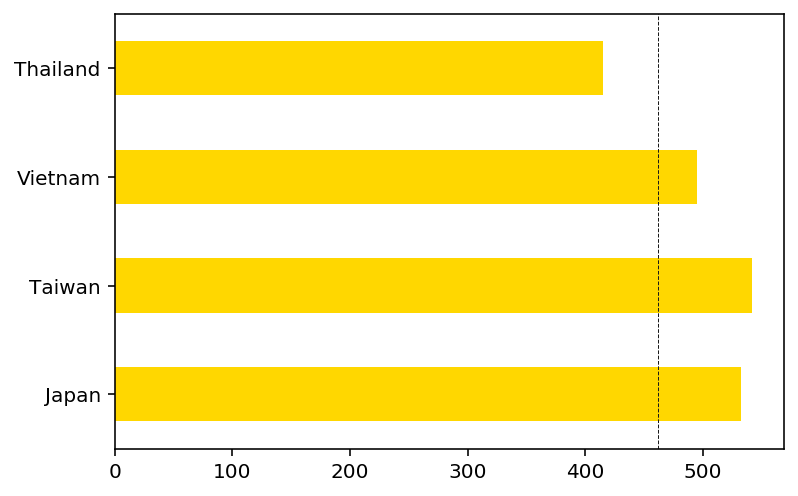

In [33]:
ax=df.loc[['Japan', 'Taiwan', 'Vietnam', 'Thailand'], 'Maths'].plot(kind='barh', color='gold')
ax.axvline(df.Maths.mean(), color=".1", linestyle="--", linewidth=.5)
ax.set_ylabel('');

# To create each feature in separate graph by using plt.subplots()

In [ ]:
fig, ax = plt.subplots(1,3, sharex=True, sharey=True, figsize=(10, 2))
country_list = ['Japan', 'Taiwan', 'Vietnam', 'Thailand']
df.loc[country_list, 'Maths'].plot(kind='barh', color='gold', ax=ax[0], title='Maths');
df.loc[country_list, 'Science'].plot(kind='barh', color='deepskyblue', ax=ax[1], title='Science');
df.loc[country_list, 'Reading'].plot(kind='barh', color='tomato', ax=ax[2], title='Reading');

In [ ]:
fig, ax = plt.subplots(1,3, sharex=True, sharey=True, figsize=(10, 2))
country_list = ['Japan', 'Taiwan', 'Vietnam', 'Thailand']
ax0=df.loc[country_list, 'Maths'].plot(kind='barh', color='gold', ax=ax[0], title='Maths');
ax0.axvline(df.Maths.mean(), color=".6", linestyle="--", linewidth=.5)

ax1=df.loc[country_list, 'Science'].plot(kind='barh', color='deepskyblue', ax=ax[1], title='Science');
ax1.axvline(df.Science.mean(), color=".6", linestyle="--", linewidth=.5)

ax2=df.loc[country_list, 'Reading'].plot(kind='barh', color='tomato', ax=ax[2], title='Reading');
ax2.axvline(df.Reading.mean(), color=".6", linestyle="--", linewidth=.5)

# Summary above code to be only  code as below

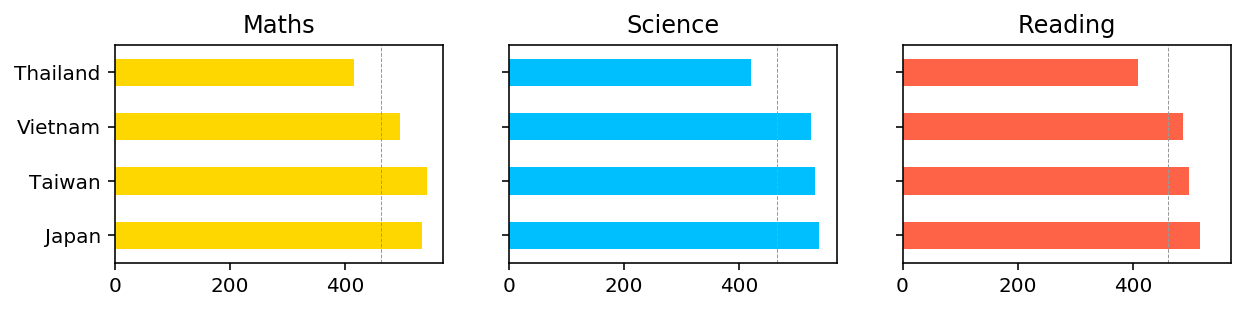

In [34]:
fig, ax = plt.subplots(1,3, sharex=True, sharey=True, figsize=(10, 2))
country_list = ['Japan', 'Taiwan', 'Vietnam', 'Thailand']
color = ['gold', 'deepskyblue', 'tomato']
subject = ['Maths', 'Science', 'Reading']
for i in range(len(subject)):
    ax0=df.loc[country_list, subject[i]].plot(kind='barh', color=color[i], ax=ax[i], title=subject[i])
    ax0.axvline(df[subject[i]].mean(), color=".6", linestyle="--", linewidth=.5)
    ax0.set_ylabel('');

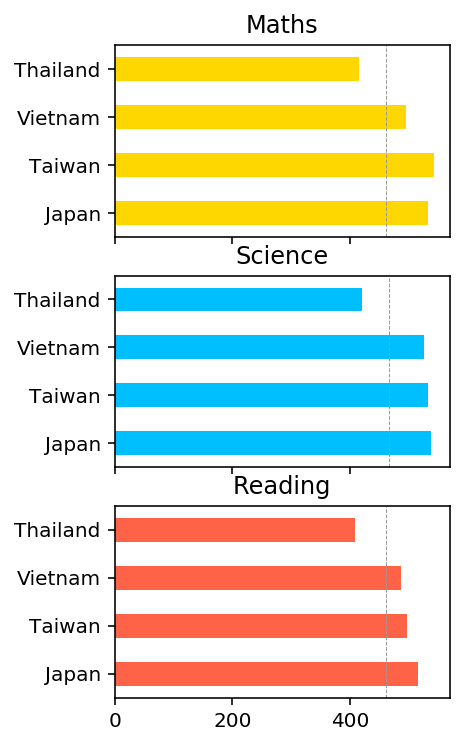

In [35]:
fig, ax = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(3, 6))
country_list = ['Japan', 'Taiwan', 'Vietnam', 'Thailand']
color = ['gold', 'deepskyblue', 'tomato']
subject = ['Maths', 'Science', 'Reading']
for i in range(len(subject)):
    ax0=df.loc[country_list, subject[i]].plot(kind='barh', color=color[i], ax=ax[i], title=subject[i])
    ax0.axvline(df[subject[i]].mean(), color=".6", linestyle="--", linewidth=.5)
    ax0.set_ylabel('');

## การกำหนดรูปแบบการแสดงตัวเลขในแกน เช่น มีการคั่นด้วย , ในเลขหลักพัน //https://www.youtube.com/watch?v=26Nmks3vctU&list=PLoTScYm9O0GFVfRk_MmZt0vQXNIi36LUz&index=31

In [36]:
df['Total'] = df.Maths + df.Science + df.Reading

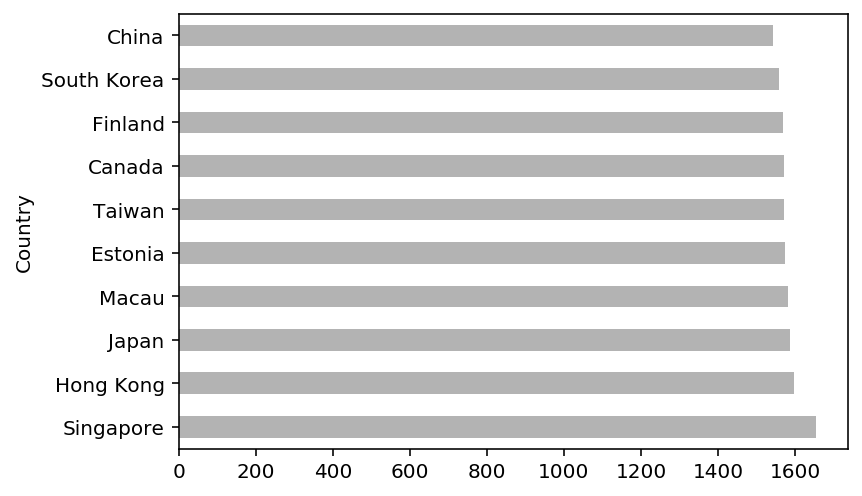

In [37]:
df.nlargest(10, 'Total')['Total'].plot(kind='barh', color='.7');

In [39]:
def fmt_pct(v, pos):
    return "{:.1f}%".format(100 * v)

In [40]:
def fmt_thousand(v, pos):
    return "{:,.0f}".format(v)

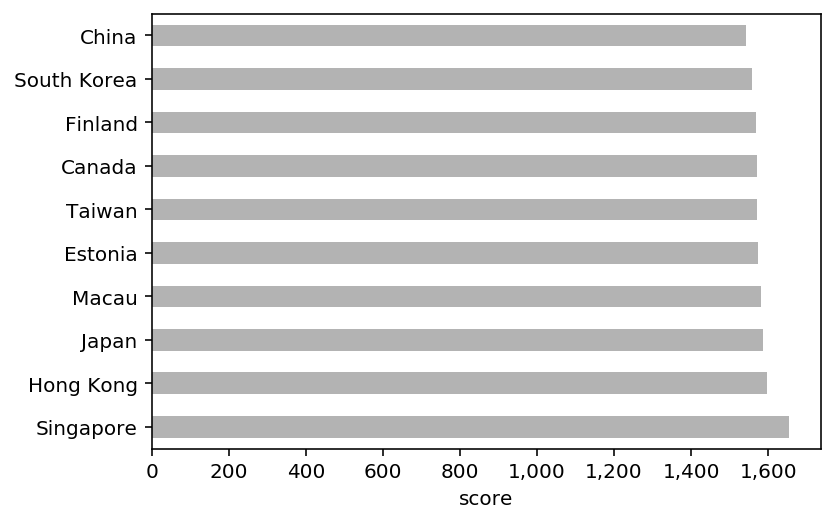

In [41]:
ax=df.nlargest(10, 'Total')['Total'].plot(kind='barh', color='.7')
ax.set_xlabel('score')
ax.set_ylabel('')
ax.xaxis.set_major_formatter(FuncFormatter(lambda v, p: "{:,.0f}".format(v)))

## BAR Graph //https://www.youtube.com/watch?v=26Nmks3vctU&list=PLoTScYm9O0GFVfRk_MmZt0vQXNIi36LUz&index=31